## Final Project Submission

Please fill out:
* Student name: Christos, Marcos and Rachel
* Student pace: Full Time
* Scheduled project review date/time: 02/19/2021 - 5p.m. CT
* Instructor name: Max Barry
* Blog post URL: www.google.com


# **Goal**: To create a model to get a criterion as high of accuracy as possible using Multiple Regression

In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn import ensemble

In [670]:
df = pd.read_csv("data/kc_house_data.csv")

In [83]:
df.shape

(21597, 19)

In [571]:
df.sort_values('date')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
12076,1/10/2015,325000.0,4,2.50,2240,5105,2.0,0.0,0.0,4,8,2002,0.0,98042,47.3922,-122.165,1920,5288,0
19359,1/12/2015,330000.0,4,2.50,2240,7589,2.0,0.0,0.0,3,8,1994,0.0,98030,47.3824,-122.207,2250,7300,0
2548,1/12/2015,265000.0,4,1.50,1740,12728,1.0,0.0,0.0,4,7,1964,0.0,98003,47.2808,-122.300,1830,11125,1
18398,1/12/2015,359000.0,4,2.50,1820,11325,1.0,0.0,0.0,3,8,1976,0.0,98166,47.4574,-122.361,1990,10802,1
11086,1/12/2015,435000.0,4,2.50,2060,10125,2.0,0.0,0.0,4,7,1979,0.0,98028,47.7640,-122.262,1760,9876,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19256,9/9/2014,550000.0,3,1.50,1730,5750,1.0,0.0,0.0,3,7,1947,0.0,98116,47.5645,-122.397,1370,5750,1
66,9/9/2014,975000.0,4,2.50,2720,11049,2.0,0.0,0.0,3,10,1989,0.0,98004,47.5815,-122.192,2750,11049,0
20288,9/9/2014,520000.0,2,1.75,1340,1368,2.0,0.0,0.0,3,7,2006,0.0,98122,47.6180,-122.311,2480,1707,1
12438,9/9/2014,344950.0,3,1.75,1870,7500,1.0,0.0,0.0,5,8,1978,0.0,98058,47.4428,-122.134,1870,7275,1


In [130]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [144]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition        float64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [147]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.321108,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.088213,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.271689,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [671]:
df['sqft_basement'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [672]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [673]:
df['condition'] = np.where(df['condition']=='?', 0, df['condition'])

In [674]:
df['condition'] = df['condition'].astype(float)

In [146]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df, 15))

sqft_living  sqft_above       0.876448
             grade            0.762779
             sqft_living15    0.756402
grade        sqft_above       0.756073
bathrooms    sqft_living      0.755758
sqft_above   sqft_living15    0.731767
sqft_lot     sqft_lot15       0.718204
grade        sqft_living15    0.713867
price        sqft_living      0.701917
bathrooms    sqft_above       0.686668
price        grade            0.667951
bathrooms    grade            0.665838
price        sqft_above       0.605368
             sqft_living15    0.585241
bedrooms     sqft_living      0.578212
dtype: float64


### We can see that we have some outliers

# Which strategy to adopt with the NaN Values?

In [675]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [654]:
df['waterfront'].value_counts()

# Maybe replace nan values with 0, since it's very unlikely that such important thing would not be mentioned

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [655]:
df['yr_renovated'].value_counts()

# Define a value to be clear that we don't have this value, removing NaN values OR removing rows with NaN values.

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [656]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

### Based on our dataframe all the values are fitable of replacing the NaN value for a 0

In [676]:
df = df.fillna(0)

In [677]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### We drop the columns that don't give us any value to the predicting ***

In [678]:
df = df.drop(columns=['id', 'sqft_above'])

### Let's take a look at the new table

In [45]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [679]:
df['has_basement1'] = np.where(df['sqft_basement']=='?', 0, df['sqft_basement'])

In [661]:
df['has_basement1'] = df['has_basement1'].astype(float)

In [680]:
df['has_basement'] = np.where(df['has_basement1']>0, 1, 0)

In [681]:
df = df.drop(columns=['sqft_basement', 'has_basement1'])

In [664]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,0,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0


In [684]:
df['has_basement'] = df['has_basement'].astype(str)

In [685]:
type(df['has_basement'][0])

str

## Checking for outliers

In [95]:
df_expensive = df.sort_values(by=['price'], ascending=False)

In [96]:
df_expensive[60:80]
# Talvez remover os 3 primeiros? Deixar a partir do 5.5 mi ja que eh 10x o mean

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
269,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,0.0,2.0,3,11,1982,0.0,98004,47.6312,-122.223,3890,20060,1
7926,9/17/2014,2900000.0,4,3.25,4580,4838,2.0,0.0,3.0,4,11,1991,0.0,98109,47.6305,-122.354,3540,6483,1
14542,6/11/2014,2890000.0,5,6.25,8670,64033,2.0,0.0,4.0,3,13,1965,0.0,98177,47.7295,-122.372,4140,81021,1
3809,12/19/2014,2890000.0,4,4.00,5780,7173,2.0,0.0,0.0,3,11,2008,0.0,98112,47.6374,-122.288,3930,7994,1
14017,9/26/2014,2890000.0,7,3.00,5350,14400,2.5,0.0,0.0,4,10,1910,0.0,98112,47.6295,-122.285,3050,7469,1
4186,7/29/2014,2880000.0,4,2.50,5760,32033,2.0,0.0,4.0,4,12,1994,0.0,98177,47.7288,-122.370,3420,28475,1
5444,5/1/2015,2850000.0,4,4.00,5040,17208,1.0,0.0,0.0,5,10,1976,0.0,98006,47.5701,-122.188,4050,18647,1
11608,4/15/2015,2800000.0,5,3.25,4590,12793,2.0,0.0,2.0,5,11,1928,0.0,98199,47.6453,-122.410,2920,8609,1
11434,12/9/2014,2750000.0,4,4.00,4130,5575,2.0,1.0,4.0,4,10,1993,0.0,98075,47.5968,-122.083,2980,5575,1
2265,1/12/2015,2750000.0,5,4.00,6300,16065,2.0,0.0,1.0,3,12,2004,0.0,98004,47.5922,-122.207,3260,17287,1


In [97]:
df_expensive['price'].mean()

540296.5735055795

In [82]:
type(dfcaro['price'][0])

numpy.float64

In [ ]:
# Fazer duas tabelas, uma com e outra sem outliers e partir dai. Partindo do mean ou do 75% tira os outliers 
# de preco, que provavelmente vao limpar o lance de outliers de quantidade de quartos e etc.

In [ ]:
# Usar .corr() pra ver quais sao as coisas que se correlacionam mt, e dropar coisas acima de 0.7

In [120]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.178264
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.158412
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,0.159863
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,0.201198
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.034889
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.252465
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.083823,0.030658,0.039220
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083,0.176905
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.130542
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981,0.050701


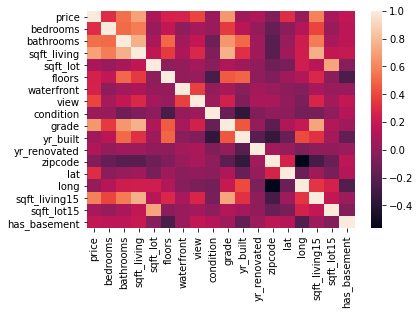

In [89]:
sns.heatmap(df.corr());

In [90]:

df.corr()['sqft_lot']['sqft_lot15']

0.7182040308060962

In [92]:
df.corr()['price']['sqft_living']

0.7019173021377597

In [94]:
df.dtypes

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
has_basement       int32
dtype: object

In [ ]:
# drop 1 lot
# drop 1 living
# split between model and target

In [381]:
df1 = df.drop(['date', 'grade', 'sqft_living15', 'sqft_lot15',  ], axis=1)

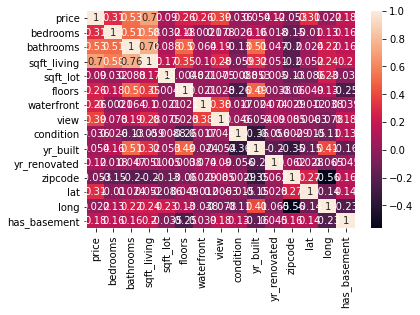

In [204]:
sns.heatmap(df1.corr(), annot=True);

In [206]:
def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df1, 15))

bathrooms    sqft_living    0.755758
price        sqft_living    0.701917
bedrooms     sqft_living    0.578212
zipcode      long           0.564259
price        bathrooms      0.525906
bedrooms     bathrooms      0.514508
bathrooms    yr_built       0.507173
             floors         0.502582
floors       yr_built       0.489193
yr_built     long           0.409993
price        view           0.393497
waterfront   view           0.380543
condition    yr_built       0.361592
sqft_living  floors         0.353953
yr_built     zipcode        0.347210
dtype: float64


In [125]:
df1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,1955,0.0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,1951,1991.0,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,1933,0.0,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,1965,0.0,98136,47.5208,-122.393,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,1987,0.0,98074,47.6168,-122.045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,2009,0.0,98103,47.6993,-122.346,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,2014,0.0,98146,47.5107,-122.362,0
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,2009,0.0,98144,47.5944,-122.299,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,2004,0.0,98027,47.5345,-122.069,0


In [ ]:
price        sqft_living      0.701917
price        sqft_living15    0.585241

price	     sqft_lot         0.089876
price	     sqft_lot15	      0.082845 

### df['sqft_lot'] < df['sqft_lot15']

In [117]:
print(df1.corr()['sqft_lot'].sum(), df1.corr()['sqft_lot15'].sum())

2.223409602756378 2.2497457031609387


In [701]:
# Sqft_lot has a lower correlation with other variables and a better one with price - a no brainer

In [ ]:
df1 = df.drop(['sqft_lot15'])

### df['sqft_living'] > df['sqft_living15']

In [128]:
print(df.corr()['sqft_living'].sum(), df.corr()['sqft_living15'].sum())

6.257701254359455 5.373501212633876


In [163]:
# But sqft_living is better correlated with Price by quite a lot, and also we are not sure about what sqft_lot15 means, 
# so from a business understanding standpoint, is better to go with sqft_lot

In [ ]:
df1 = df.drop(['sqft_living']

In [160]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.053953,0.117855,-0.053402,0.306692,0.022036,0.178264
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.158412
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.507173,0.047177,-0.204786,0.024280,0.224903,0.159863
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.318152,0.051060,-0.199802,0.052155,0.241214,0.201198
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.052946,0.004979,-0.129586,-0.085514,0.230227,-0.034889
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.489193,0.003793,-0.059541,0.049239,0.125943,-0.252465
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.039220
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.176905
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,0.130542
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.054452,-0.361592,1.000000,-0.202555,-0.347210,-0.148370,0.409993,-0.163992


In [489]:
price_kctest = "price~bedrooms+sqft_living"
pricekc_modtest = ols(formula=price_kctest, data=df1).fit()
pricekc_mod_summtest = pricekc_modtest.summary()

In [178]:
price_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7401.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:39:08   Log-Likelihood:            -2.9975e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21593   BIC:                         5.995e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.639e+04   6956.321     10.981      0.000    6.28e+04       9e+04
bedrooms    -5.857e+04   2347.628    -24.950      0.000   -6.32e+04    -5.4e+04
bathrooms    7659.0953   3523.302      2.174      0.030     753.163    1.46e+04
sqft_living   310.1848      3.101    100.011      0.000     304.106     316.264
==============================================================================
Omnibus:                    14417.262   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           490912.091
Skew:                           2.734   Prob(JB):                         0.00
Kurtosis:                      25.707   Cond. No.                     9.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
pricekc_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     4264.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:41:26   Log-Likelihood:            -2.9895e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21590   BIC:                         5.980e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.424e+04   7458.024      9.954      0.000    5.96e+04    8.89e+04
bedrooms    -5.331e+04   2287.434    -23.307      0.000   -5.78e+04   -4.88e+04
bathrooms    7272.2393   3693.899      1.969      0.049      31.924    1.45e+04
sqft_living   302.3173      3.055     98.969      0.000     296.330     308.305
sqft_lot       -0.3736      0.042     -8.947      0.000      -0.455      -0.292
floors       1090.7686   3653.865      0.299      0.765   -6071.077    8252.614
waterfront   8.288e+05   2.08e+04     39.802      0.000    7.88e+05     8.7e+05
==============================================================================
Omnibus:                    13040.834   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           389221.484
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                      23.238   Cond. No.                     5.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
pricekc_mod_summ1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     2919.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:42:25   Log-Likelihood:            -2.9755e+05
No. Observations:               21597   AIC:                         5.951e+05
Df Residuals:                   21585   BIC:                         5.952e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.346e+06   1.47e+05     36.340      0.000    5.06e+06    5.63e+06
bedrooms     -5.719e+04   2166.643    -26.394      0.000   -6.14e+04   -5.29e+04
bathrooms     5.821e+04   3790.596     15.355      0.000    5.08e+04    6.56e+04
sqft_living    277.7812      2.943     94.383      0.000     272.012     283.550
sqft_lot        -0.3242      0.039     -8.237      0.000      -0.401      -0.247
floors         5.76e+04   3849.233     14.965      0.000    5.01e+04    6.51e+04
waterfront    5.762e+05    2.1e+04     27.475      0.000    5.35e+05    6.17e+05
view          5.964e+04   2375.236     25.110      0.000     5.5e+04    6.43e+04
condition     1.816e+04   2680.272      6.775      0.000    1.29e+04    2.34e+04
yr_built     -2777.3459     74.450    -37.305      0.000   -2923.272   -2631.419
yr_renovated    15.6191      4.592      3.401      0.001       6.618      24.620
has_basement -4733.9297   3701.442     -1.279      0.201    -1.2e+04    2521.170
==============================================================================
Omnibus:                    13103.089   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           469428.472
Skew:                           2.351   Prob(JB):                         0.00
Kurtosis:                      25.351   Cond. No.                     4.09e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
pricekc_mod_summ2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3037.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        15:43:15   Log-Likelihood:            -2.9564e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21582   BIC:                         5.914e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.192e+06   3.06e+06      2.348      0.019    1.19e+06    1.32e+07
bedrooms      -4.97e+04   1989.858    -24.979      0.000   -5.36e+04   -4.58e+04
bathrooms     5.108e+04   3471.770     14.712      0.000    4.43e+04    5.79e+04
sqft_living    269.8223      2.741     98.457      0.000     264.451     275.194
sqft_lot        -0.0527      0.037     -1.431      0.152      -0.125       0.019
floors        3.108e+04   3623.477      8.579      0.000     2.4e+04    3.82e+04
waterfront    5.889e+05   1.92e+04     30.675      0.000    5.51e+05    6.27e+05
view          6.621e+04   2189.356     30.242      0.000    6.19e+04    7.05e+04
condition     2.486e+04   2475.902     10.039      0.000       2e+04    2.97e+04
yr_built     -1846.7636     74.216    -24.884      0.000   -1992.233   -1701.295
yr_renovated    25.6291      4.208      6.090      0.000      17.380      33.878
has_basement -3.601e+04   3529.392    -10.202      0.000   -4.29e+04   -2.91e+04
zipcode       -715.6072     34.755    -20.590      0.000    -783.729    -647.485
lat           6.997e+05   1.12e+04     62.613      0.000    6.78e+05    7.22e+05
long         -2.721e+05   1.36e+04    -19.955      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15312.037   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           844322.716
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      33.105   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# transformar zipcode e has_basement em categorical values

In [193]:
df1['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [194]:
df1['has_basement'].value_counts()

0    13280
1     8317
Name: has_basement, dtype: int64

In [195]:
columnsdf1 = list(df1.columns)

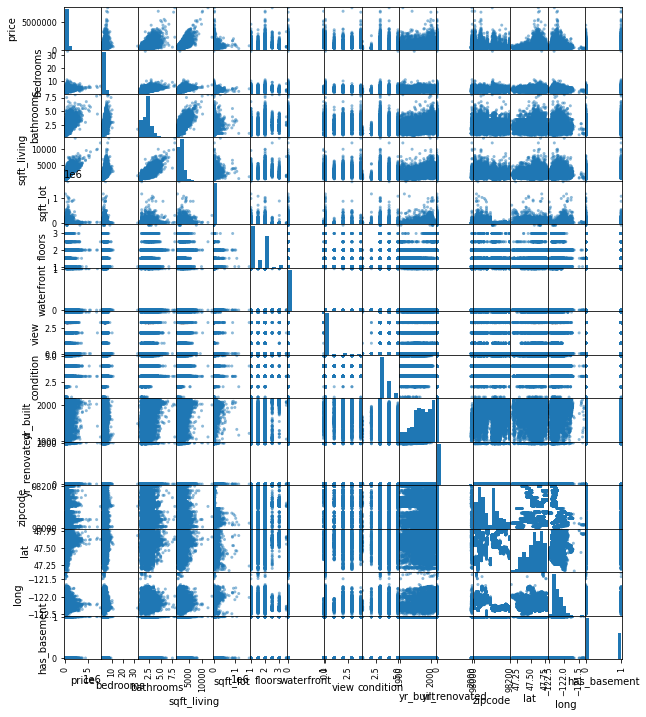

In [196]:
pd.plotting.scatter_matrix(df1[columnsdf], figsize=(10,12));

In [199]:
df1[columnsdf].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.053953,0.117855,-0.053402,0.306692,0.022036,0.178264
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.158412
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.507173,0.047177,-0.204786,0.024280,0.224903,0.159863
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.318152,0.051060,-0.199802,0.052155,0.241214,0.201198
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.052946,0.004979,-0.129586,-0.085514,0.230227,-0.034889
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.489193,0.003793,-0.059541,0.049239,0.125943,-0.252465
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,-0.024487,0.073939,0.028923,-0.012157,-0.037628,0.039220
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.176905
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,0.130542
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.054452,-0.361592,1.000000,-0.202555,-0.347210,-0.148370,0.409993,-0.163992


In [209]:
df1['has_basement'] = df1['has_basement'].astype(str)

In [211]:
df1.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,1970.999676,68.758207,98077.951845,47.560093,-122.213982
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,29.375234,364.037499,53.513072,0.138552,0.140724
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [212]:
df1.dtypes

price           float64
bedrooms          int64
bathrooms       float64
sqft_living       int64
sqft_lot          int64
floors          float64
waterfront      float64
view            float64
condition         int64
yr_built          int64
yr_renovated    float64
zipcode           int64
lat             float64
long            float64
has_basement     object
dtype: object

In [214]:
df1['price'][0:10]

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: price, dtype: float64

In [410]:
b = df1.sort_values(['price'], ascending=False)

In [411]:
b.shape

(21597, 15)

In [412]:
b[800:850]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
738,1300000.0,3,3.25,3400,5979,2.0,0.0,0.0,4,1937,0.0,98105,47.6585,-122.273,1
8330,1300000.0,5,1.00,1670,6400,1.5,0.0,0.0,3,1919,0.0,98119,47.6542,-122.373,0
11081,1300000.0,5,3.50,3700,8504,2.0,0.0,0.0,3,1950,2014.0,98105,47.6690,-122.275,1
20236,1300000.0,3,2.50,3350,7752,1.0,0.0,0.0,3,2009,0.0,98008,47.6263,-122.099,1
16170,1300000.0,5,1.75,2130,19180,1.0,0.0,0.0,3,1968,0.0,98004,47.6380,-122.213,1
427,1300000.0,3,2.00,2350,15021,1.0,0.0,0.0,4,1976,0.0,98004,47.6408,-122.219,1
8411,1300000.0,5,3.75,3490,15246,1.0,0.0,1.0,4,1968,0.0,98040,47.5479,-122.212,1
12597,1300000.0,5,3.75,4450,7680,2.0,0.0,0.0,3,2010,0.0,98199,47.6418,-122.392,1
14668,1300000.0,2,2.50,2910,19449,2.0,1.0,4.0,5,1985,0.0,98177,47.7729,-122.393,1
14202,1290000.0,5,3.50,2980,5100,2.0,0.0,0.0,3,2015,0.0,98115,47.6782,-122.299,1


In [229]:
21597 * 0.05


1079.8500000000001

In [231]:
c = b[1079:]

In [232]:
c

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
15822,1160000.0,4,2.50,3860,10361,2.0,0.0,2.0,4,1985,0.0,98006,47.5517,-122.147,1
13709,1160000.0,5,1.75,2870,9680,1.0,0.0,4.0,5,1966,0.0,98008,47.6122,-122.111,1
18953,1160000.0,4,2.50,2960,26742,1.0,0.0,3.0,3,1949,1996.0,98115,47.6846,-122.268,1
6976,1160000.0,3,1.75,1640,10464,1.0,0.0,2.0,4,1968,0.0,98004,47.5873,-122.205,0
4622,1160000.0,4,2.50,4240,43995,2.0,0.0,0.0,3,1989,0.0,98075,47.6008,-122.044,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,1951,0.0,98168,47.4799,-122.296,0
8267,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,1954,0.0,98146,47.4987,-122.341,0
16184,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,1943,0.0,98168,47.4808,-122.315,0
465,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,1912,0.0,98014,47.6499,-121.909,0


In [233]:
price_kc3 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod3 = ols(formula=price_kc3, data=c).fit()
pricekc_mod_summ3 = pricekc_mod3.summary()

In [413]:
pricekc_mod_summ3

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     2481.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:04:20   Log-Likelihood:            -2.7053e+05
No. Observations:               20518   AIC:                         5.411e+05
Df Residuals:                   20503   BIC:                         5.412e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -8.731e+05    1.9e+06     -0.459      0.646    -4.6e+06    2.85e+06
has_basement[T.1] -4494.3845   2208.027     -2.035      0.042   -8822.294    -166.475
bedrooms          -2.092e+04   1259.478    -16.609      0.000   -2.34e+04   -1.84e+04
bathrooms           2.64e+04   2211.944     11.936      0.000    2.21e+04    3.07e+04
sqft_living         161.4627      1.890     85.419      0.000     157.758     165.168
sqft_lot              0.1613      0.023      6.876      0.000       0.115       0.207
floors             4.855e+04   2289.662     21.204      0.000    4.41e+04     5.3e+04
waterfront         1.088e+05   1.83e+04      5.936      0.000    7.29e+04    1.45e+05
view               4.298e+04   1510.872     28.449      0.000       4e+04    4.59e+04
condition           2.46e+04   1538.941     15.984      0.000    2.16e+04    2.76e+04
yr_built          -1118.9967     47.026    -23.795      0.000   -1211.171   -1026.823
yr_renovated         16.4699      2.745      5.999      0.000      11.089      21.851
zipcode            -354.4882     21.620    -16.397      0.000    -396.865    -312.112
lat                6.259e+05   6827.563     91.671      0.000    6.13e+05    6.39e+05
long               -6.62e+04   8422.407     -7.860      0.000   -8.27e+04   -4.97e+04
==============================================================================
Omnibus:                     1521.761   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2731.518
Skew:                           0.543   Prob(JB):                         0.00
Kurtosis:                       4.419   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [490]:
pricekc_mod_summtest

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        09:29:28   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.091e+04   6638.826     12.187      0.000    6.79e+04    9.39e+04
bedrooms    -5.783e+04   2322.987    -24.896      0.000   -6.24e+04   -5.33e+04
sqft_living   314.6011      2.344    134.232      0.000     310.007     319.195
==============================================================================
Omnibus:                    14391.571   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488612.629
Skew:                           2.728   Prob(JB):                         0.00
Kurtosis:                      25.654   Cond. No.                     8.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [422]:
d = b

In [446]:
price_kc4 = "price~bedrooms+bathrooms+sqft_living+floors+waterfront+view+condition+yr_built+has_basement+zipcode+lat+long"
pricekc_mod4 = ols(formula=price_kc4, data=d).fit()
pricekc_mod_summ4 = pricekc_mod4.summary()

In [447]:
pricekc_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3534.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:58:43   Log-Likelihood:            -2.9566e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21584   BIC:                         5.914e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.671e+06   3.05e+06      2.517      0.012     1.7e+06    1.36e+07
has_basement[T.1] -3.597e+04   3530.191    -10.190      0.000   -4.29e+04   -2.91e+04
bedrooms          -4.986e+04   1984.074    -25.130      0.000   -5.37e+04    -4.6e+04
bathrooms          5.379e+04   3447.169     15.605      0.000     4.7e+04    6.05e+04
sqft_living         269.1469      2.713     99.219      0.000     263.830     274.464
floors             3.232e+04   3618.494      8.933      0.000    2.52e+04    3.94e+04
waterfront         5.941e+05   1.92e+04     30.951      0.000    5.57e+05    6.32e+05
view               6.642e+04   2188.749     30.345      0.000    6.21e+04    7.07e+04
condition           2.26e+04   2449.032      9.228      0.000    1.78e+04    2.74e+04
yr_built          -1971.8868     71.038    -27.758      0.000   -2111.126   -1832.648
zipcode            -719.6080     34.777    -20.692      0.000    -787.774    -651.443
lat                6.987e+05   1.11e+04     62.675      0.000    6.77e+05    7.21e+05
long              -2.738e+05   1.34e+04    -20.379      0.000      -3e+05   -2.48e+05
==============================================================================
Omnibus:                    15345.675   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           851698.630
Skew:                           2.834   Prob(JB):                         0.00
Kurtosis:                      33.238   Cond. No.                     2.06e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# We checked for outliers by our distribuition, verified for the 75%, 95% and tried the FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

In [328]:
b1 = df1.sort_values(['price'], ascending=True)

In [329]:
b1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
15279,78000.0,2,1.00,780,16344,1.0,0.0,0.0,1,1942,0.0,98168,47.4739,-122.280,0
465,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,1912,0.0,98014,47.6499,-121.909,0
16184,81000.0,2,1.00,730,9975,1.0,0.0,0.0,1,1943,0.0,98168,47.4808,-122.315,0
8267,82000.0,3,1.00,860,10426,1.0,0.0,0.0,3,1954,0.0,98146,47.4987,-122.341,0
2139,82500.0,2,1.00,520,22334,1.0,0.0,0.0,2,1951,0.0,98168,47.4799,-122.296,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,3,2009,0.0,98004,47.6232,-122.220,1
4407,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,3,2001,0.0,98039,47.6289,-122.233,1
9245,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,3,2001,0.0,98039,47.6305,-122.240,1
3910,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,3,1940,2001.0,98004,47.6500,-122.214,1


In [346]:
e = b1[1:]

In [470]:
price_kc5 = "price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+yr_built+yr_renovated+has_basement+zipcode+lat+long"
pricekc_mod5 = ols(formula=price_kc5, data=d).fit()
pricekc_mod_summ5 = pricekc_mod5.summary()

In [471]:
pricekc_mod_summ5

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     3037.
Date:                Sun, 14 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:02:52   Log-Likelihood:            -2.9564e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21582   BIC:                         5.914e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.192e+06   3.06e+06      2.348      0.019    1.19e+06    1.32e+07
has_basement[T.1] -3.601e+04   3529.392    -10.202      0.000   -4.29e+04   -2.91e+04
bedrooms           -4.97e+04   1989.858    -24.979      0.000   -5.36e+04   -4.58e+04
bathrooms          5.108e+04   3471.770     14.712      0.000    4.43e+04    5.79e+04
sqft_living         269.8223      2.741     98.457      0.000     264.451     275.194
sqft_lot             -0.0527      0.037     -1.431      0.152      -0.125       0.019
floors             3.108e+04   3623.477      8.579      0.000     2.4e+04    3.82e+04
waterfront         5.889e+05   1.92e+04     30.675      0.000    5.51e+05    6.27e+05
view               6.621e+04   2189.356     30.242      0.000    6.19e+04    7.05e+04
condition          2.486e+04   2475.902     10.039      0.000       2e+04    2.97e+04
yr_built          -1846.7636     74.216    -24.884      0.000   -1992.233   -1701.295
yr_renovated         25.6291      4.208      6.090      0.000      17.380      33.878
zipcode            -715.6072     34.755    -20.590      0.000    -783.729    -647.485
lat                6.997e+05   1.12e+04     62.613      0.000    6.78e+05    7.22e+05
long              -2.721e+05   1.36e+04    -19.955      0.000   -2.99e+05   -2.45e+05
==============================================================================
Omnibus:                    15312.037   Durbin-Watson:                   1.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           844322.716
Skew:                           2.826   Prob(JB):                         0.00
Kurtosis:                      33.105   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# We checked for outliers by our distribuition in the other side, veryfing if cheaper houses
# would interfer a lot and tried FSM without them and realized that our 
# R-Squared was actually dropping it, meaning that they are significant for our model.

# Linear Regression bobagem


In [351]:
y = df1['price']
predictors = df1.drop('price', axis=1)
linreg = LinearRegression()
linreg.fit(predictors, y)
linreg.coef_

array([-4.97041739e+04,  5.10772114e+04,  2.69822301e+02, -5.26574361e-02,
        3.10847957e+04,  5.88887743e+05,  6.62106987e+04,  2.48559729e+04,
       -1.84676363e+03,  2.56291217e+01, -7.15607237e+02,  6.99740068e+05,
       -2.72101615e+05, -3.60077566e+04])

In [352]:
linreg.intercept_

7191790.040940723

In [ ]:
bathrooms    sqft_living    0.755758
price        sqft_living    0.701917
bedrooms     sqft_living    0.578212
zipcode      long           0.564259
price        bathrooms      0.525906
bedrooms     bathrooms      0.514508
bathrooms    yr_built       0.507173

In [386]:
df1['has_basement'] = df1['has_basement'].astype(str)

In [408]:
df1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,1955,0.0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,1951,1991.0,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,1933,0.0,98028,47.7379,-122.233,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,1965,0.0,98136,47.5208,-122.393,1
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,1987,0.0,98074,47.6168,-122.045,0


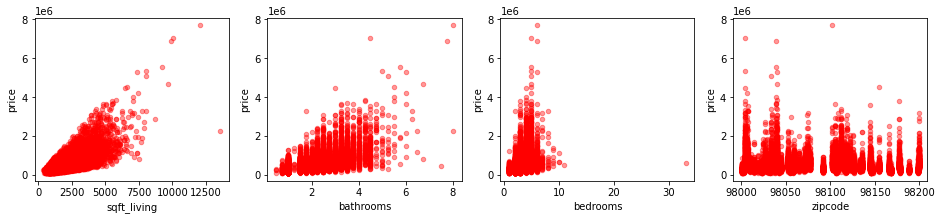

In [545]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['sqft_living', 'bathrooms', 'bedrooms', 'zipcode'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='r')

In [431]:
# REMOVER YEAR_RENOVATED NAO ADICIONA NADA

In [477]:
# REMOVER SQF_LOT, NAO ADICIONA NADA

<ipython-input-481-7e9de8babc3d>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax = ax)


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

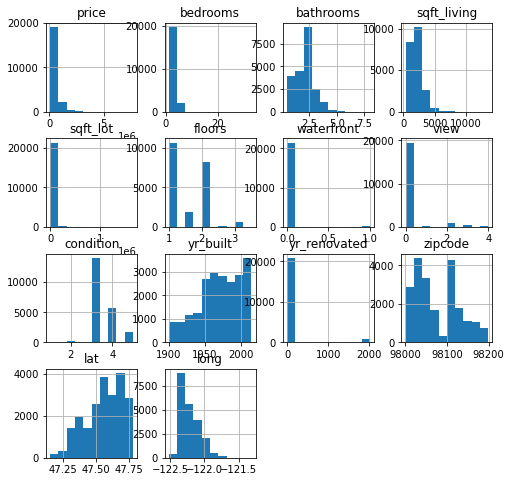

In [481]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df1.hist(ax = ax)

In [482]:
df1['yr_renovated'].nunique()
# 0.117855 corr w Price

70

In [484]:
df1['sqft_lot'].nunique()
# 0.089876 corr w Price

9776

In [485]:
df1.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.053953,0.117855,-0.053402,0.306692,0.022036
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.155670,0.017900,-0.154092,-0.009951,0.132054
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.507173,0.047177,-0.204786,0.024280,0.224903
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.318152,0.051060,-0.199802,0.052155,0.241214
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.052946,0.004979,-0.129586,-0.085514,0.230227
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.489193,0.003793,-0.059541,0.049239,0.125943
waterfront,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,-0.024487,0.073939,0.028923,-0.012157,-0.037628
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,-0.054452,0.090339,0.085059,0.006321,-0.077702
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.361592,-0.055808,0.002888,-0.015102,-0.105877
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.054452,-0.361592,1.000000,-0.202555,-0.347210,-0.148370,0.409993


# Train Test Split

In [488]:
df1.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built,yr_renovated,zipcode,lat,long,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,1955,0.0,98178,47.5112,-122.257,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,1951,1991.0,98125,47.7210,-122.319,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,1933,0.0,98028,47.7379,-122.233,0


In [519]:
y = df1.price
X = df1.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=22)

In [521]:
lr = LinearRegression()

In [522]:
lr.fit(X_train, y_train)

LinearRegression()

In [523]:
lr.score(X_train, y_train)

0.6611147546812639

In [505]:
lr.coef_


array([-4.71453441e+04,  4.27881453e+04,  2.67835740e+02, -1.72552005e-02,
        3.74073370e+04,  5.70324468e+05,  6.83054862e+04,  2.60565142e+04,
       -1.79192780e+03,  2.67859304e+01, -7.00051053e+02,  6.99670497e+05,
       -2.60655442e+05, -3.35591025e+04])

In [510]:
df1['has_basement'] = df1['has_basement'].astype(float)

In [511]:
def get_redundant_pairs(df1):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df1.columns
    for i in range(0, df1.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df1, n=5):
    au_corr = df1.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df1)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print(get_top_abs_correlations(df1, 15))

bathrooms    sqft_living    0.755758
price        sqft_living    0.701917
bedrooms     sqft_living    0.578212
zipcode      long           0.564259
price        bathrooms      0.525906
bedrooms     bathrooms      0.514508
bathrooms    yr_built       0.507173
             floors         0.502582
floors       yr_built       0.489193
yr_built     long           0.409993
price        view           0.393497
waterfront   view           0.380543
condition    yr_built       0.361592
sqft_living  floors         0.353953
yr_built     zipcode        0.347210
dtype: float64


In [524]:
df1.nunique()

price           3622
bedrooms          12
bathrooms         29
sqft_living     1034
sqft_lot        9776
floors             6
waterfront         2
view               5
condition          5
yr_built         116
yr_renovated      70
zipcode           70
lat             5033
long             751
has_basement       2
dtype: int64

<AxesSubplot:>

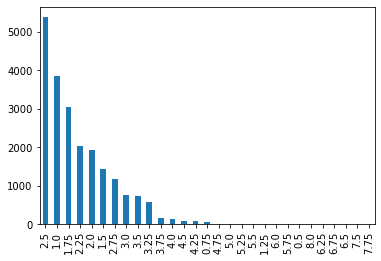

In [526]:
df1['bathrooms'].value_counts().plot(kind='bar')

<AxesSubplot:>

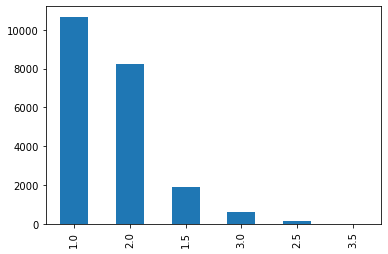

In [528]:
df1['floors'].value_counts().plot(kind='bar')

C:\Users\celes\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

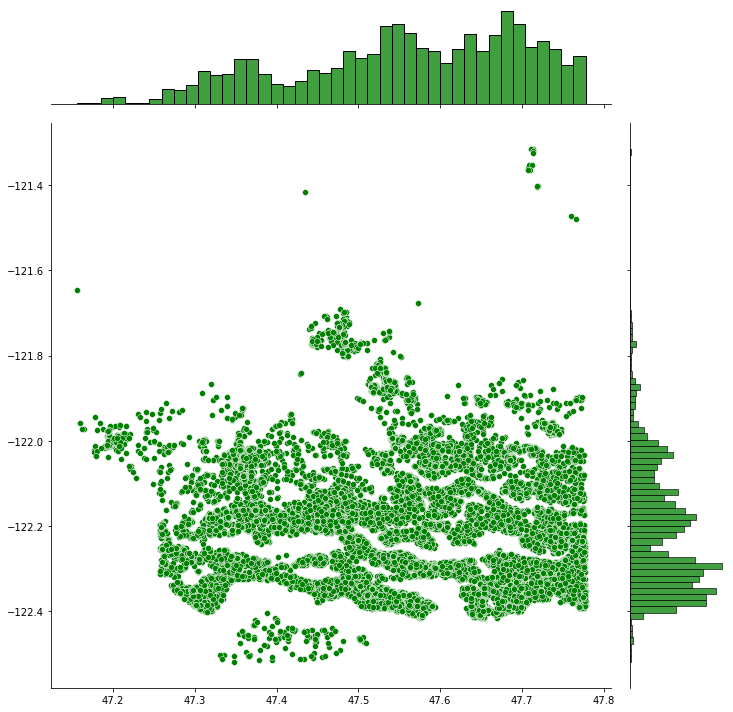

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [544]:
plt.figure(figsize=(12, 12))
sns.jointplot(x=df1.lat.values, y=df1.long.values, size=10, color='g')
plt.ylabel('Long', fontsize=12)
plt.xlabel('Lat', fontsize=12)
plt.show()
sns.despine

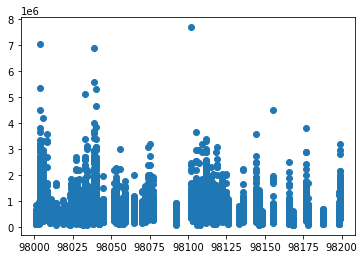

In [547]:
plt.scatter(df1.zipcode,df1.price)

In [553]:
df2 = df1.sort_values(['price'], ascending=False)[3:]

Text(0.5, 1.0, 'Prices per ZipCode (without the top 3)')

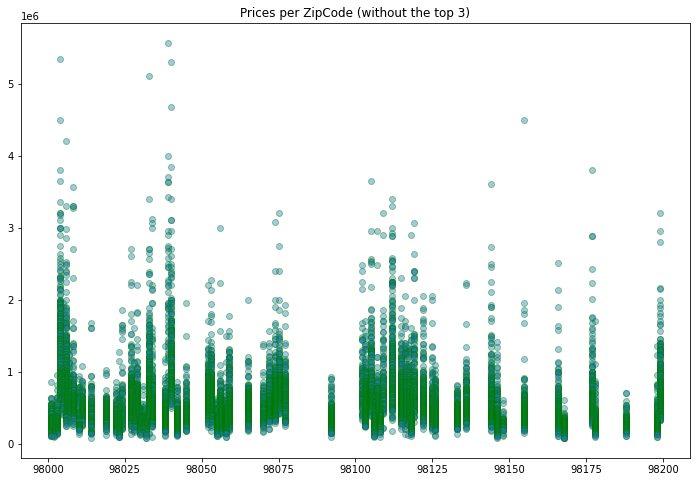

In [568]:
plt.figure(figsize = (12,8))
plt.scatter(df2.zipcode,df2.price, alpha=0.4, edgecolors='g')
plt.title("Prices per ZipCode (without the top 3)")

In [573]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509,0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200,0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007,0
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287,0


In [686]:
dftest = df

In [687]:
type(dftest['date'][0])

str

In [688]:
testlista = []
for x in dftest['date']:
    testlista.append(x[-4:])


In [689]:
testlista

['2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2015',
 '2015',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2015',
 '2014',
 '2015',
 '2014',
 '2015',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2015',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 '2015',
 '2014',
 '2014',
 

In [690]:
dftest['year_sold'] = testlista

In [691]:
dftest['year_sold'].nunique()

2

In [692]:
dftest['year_sold'] = np.where(dftest['year_sold']== '2014', 0, 1)

In [693]:
dftest['year_sold'].nunique()

2

In [694]:
dftest['year_sold'].value_counts()

0    14622
1     6975
Name: year_sold, dtype: int64

In [699]:
dftest.drop(columns=['date'], inplace=True)

In [700]:
dftest

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,0.0,98028,47.7379,-122.233,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5.0,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3.0,8,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3.0,8,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3.0,8,2014,0.0,98146,47.5107,-122.362,1830,7200,0,1
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3.0,7,2009,0.0,98144,47.5944,-122.299,1020,2007,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3.0,8,2004,0.0,98027,47.5345,-122.069,1410,1287,0,1


In [771]:
y = dftest.price
X = dftest.drop(columns=['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                   random_state=30)

In [772]:
lr.fit(X_train, y_train)

LinearRegression()

In [773]:

lr.score(X_train, y_train)

0.7018763308706021

In [774]:
lr.score(X_test, y_test)

0.6980402750316315

In [775]:
lr.coef_

array([-4.36658065e+04,  4.84245323e+04,  1.80301560e+02,  1.19154753e-01,
        5.14000229e+03,  6.63472771e+05,  4.89701075e+04,  2.81403114e+04,
        9.75944140e+04, -2.62588606e+03,  2.33180046e+01, -5.62715763e+02,
        6.05253706e+05, -2.17564193e+05,  2.29241077e+01, -3.60739712e-01,
       -2.52586441e+04,  3.23704556e+04])

In [801]:
egbr = ensemble.GradientBoostingRegressor(n_estimators = 500, max_depth = 5, min_samples_split = 25,
                                         learning_rate = 0.1, loss = 'ls')

In [802]:
egbr.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, min_samples_split=25, n_estimators=500)

In [803]:
egbr.score(X_test, y_test)

0.8999001220324832

In [804]:
dftest

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3.0,6,1933,0.0,98028,47.7379,-122.233,2720,8062,0,1
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5.0,7,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3.0,8,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3.0,8,2009,0.0,98103,47.6993,-122.346,1530,1509,0,0
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3.0,8,2014,0.0,98146,47.5107,-122.362,1830,7200,0,1
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3.0,7,2009,0.0,98144,47.5944,-122.299,1020,2007,0,0
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3.0,8,2004,0.0,98027,47.5345,-122.069,1410,1287,0,1


In [805]:
X = dftest.drop('price', axis=1)
y = dftest.price

In [809]:
kf = KFold(n_splits=5)

train_r2 = []
test_r2 = []
for train_ind, test_ind in kf.split(X, y):
    
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]
    
    lr.fit(X_train, y_train)
    train_r2.append(lr.score(X_train, y_train))
    test_r2.append(lr.score(X_test, y_test))

In [810]:
np.mean(train_r2)

0.7017457141978323

In [811]:
np.mean(test_r2)

0.6958299228101519

In [812]:
poly_2 = PolynomialFeatures(2)

df_poly = pd.DataFrame(
            poly_2.fit_transform(df.drop('price', axis=1))
                      )

X = df_poly
y = df.price

In [813]:
np.mean(train_r2)

0.7017457141978323

In [814]:
np.mean(test_r2)

0.6958299228101519

In [817]:
dftest.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,year_sold
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3.0,7,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3.0,7,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0


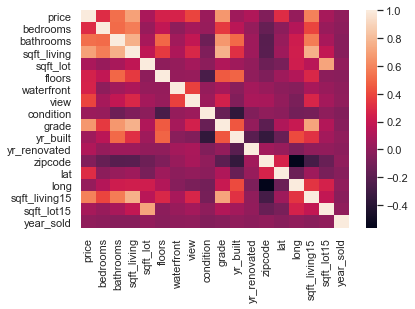

In [824]:
sns.heatmap(dftest.corr());